In [1]:
import SteadyState as ss
from stimator import read_model
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math as m

In [2]:
nfkb = """

title NFkB Linpack Model

r1: -> IKKn,                                kprod
r2: IKKn ->,                                IKKn*kdeg
r3: IKKn -> IKKa,                           IKKn*k1*Tr
r4: IKKa -> IKKi,                           IKKa*k3
r5: IKKa -> IKKi,                           A20*IKKa*k2*Tr
r6: IKKa ->,                                IKKa*kdeg
r7: IKKa + IkBa -> IKKaIkBa,                a2*IkBa*IKKa
r8: IKKaIkBa -> IKKa,                       IKKaIkBa*t1
r9: IKKa + IkBaNFkB -> IKKaIkBaNFkB,        a3*IkBaNFkB*IKKa
r10: IKKaIkBaNFkB -> IKKa + NFkB,           IKKaIkBaNFkB*t2
r11: IKKi ->,                               IKKi*kdeg
r12: IkBa + NFkB -> IkBaNFkB,               a1*IkBa*NFkB
r13: IkBaNFkB -> NFkB,                      c6a*IkBaNFkB
r141: NFkB -> ,                             i1*NFkB
r142: -> NFkBnuc,                           Kuv*i1*NFkB
r15: IkBanuc + NFkBnuc -> IkBanucNFkBnuc,   a1*IkBanuc*NFkBnuc
r16: -> A20,                                B*A20t*c4
r17: A20 ->,                                A20*c5
r18: -> A20t,                               c2
r19: -> A20t,                               c1*NFkBnuc
r20: A20t ->,                               A20t*c3
r21: -> IkBa,                               B*c4a*IkBat
r22: IkBa ->,                               c5a*IkBa
r231: IkBa -> ,                             IkBa*i1a
r232: -> IkBanuc,                           Kuv*IkBa*i1a
r241: IkBanuc ->,                           Kuv*e1a*IkBanuc
r242: -> IkBa,                              e1a*IkBanuc
r25: -> IkBat,                              B*c2a
r26: -> IkBat,                              B*c1a*NFkBnuc
r27: IkBat ->,                              c3a*IkBat
r281: IkBanucNFkBnuc ->,                    Kuv*e2a*IkBanucNFkBnuc
r282: -> IkBaNFkB,                          e2a*IkBanucNFkBnuc
r29: -> cgent,                              c2c
r30: -> cgent,                              c1c*NFkBnuc
r31: cgent ->,                              cgent*c3c
r32: -> NFkBnucTOT,                         Kuv*i1*NFkB
r33: NFkBnucTOT ->,                         Kuv*e2a*IkBanucNFkBnuc 
r34: -> NFkBcitTOT,                         e2a*IkBanucNFkBnuc
r35: NFkBcitTOT ->,                         i1*NFkB
r36: -> NFkBTOT,                            i1*NFkB + e2a*IkBanucNFkBnuc
r37: NFkBTOT ->,                            e2a*IkBanucNFkBnuc + i1*NFkB
r38: -> NFkBact,                            IKKaIkBaNFkB*t2 + c6a*IkBaNFkB + Kuv*i1*NFkB
r39: NFkBact ->,                            i1*NFkB + a1*IkBanuc*NFkBnuc + a1*IkBa*NFkB

B = 1
kprod = 2.5*10**(-5)
kdeg = 1.25*10**(-4)
k1 = 2.5*10**(-3)
Tr = 0
k3 = 1.5*10**(-3)
k2 = 1*10**(-1)
a2 = 2*10**(-1)
t1 = 1*10**(-1)
a3 = 1
t2 = 1*10**(-1)
a1 = 5*10**(-1)
c6a = 2*10**(-5)
i1 = 2.5*10**(-3)
c4 = 5*10**(-1)
c5 = 3*10**(-4)
c2 = 0
c1 = 5*10**(-7)
c3 = 4*10**(-4)
c4a = 5*10**(-1)
c5a = 1*10**(-4)
i1a = 1*10**(-3)
e1a = 5*10**(-4)
c2a = 0
c1a = 5*10**(-7)
c3a = 4*10**(-4)
e2a = 1*10**(-2)
c2c = 0
c1c = 5*10**(-7)
c3c = 4*10**(-4)
Kuv = 5

init: (IKKn = 0.2,IKKa = 0,IKKi = 0,IkBa = 0.002503995,IKKaIkBa = 0,IkBaNFkB = 0.05900152,IKKaIkBaNFkB = 0,NFkB = 0.0003145073,NFkBnuc = 0.002288688,IkBanuc = 0.003435454,IkBanucNFkBnuc = 7.862682*10**(-5),A20 = 0.0047681,A20t = 2.86086*10**(-6),IkBat = 2.86086*10**(-6),cgent = 2.86086*10**(-6),NFkBnucTOT =0.002288688 + 7.862682*10**(-5),NFkBcitTOT = 0.05900152+0.0003145073, NFkBTOT =  0.05900152+0.0003145073+0.002288688 + 7.862682*10**(-5))
"""

### 1. Alteração de parâmetros para análise comportamento do sistema

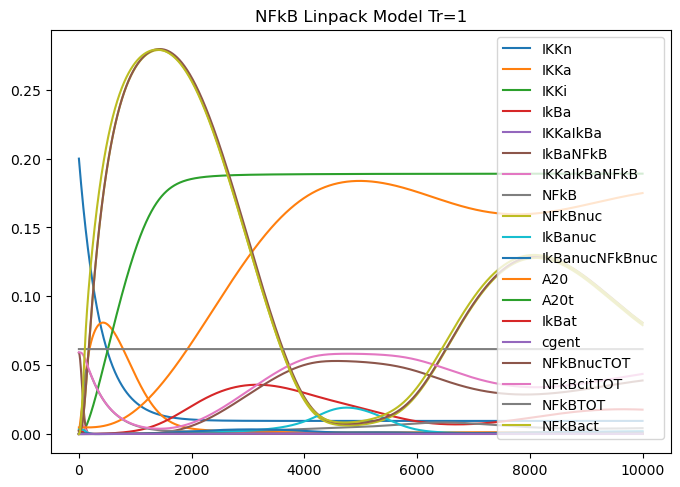

In [11]:
model = ss.SteadyState(nfkb).script('Tr',1,tf=10000).model_solve.plot()
plt.show()